In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d grassknoted/asl-alphabet
!unzip asl-alphabet.zip


Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/asl_alphabet_train/asl_alphabet_train"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [6]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 409s 185ms/step - accuracy: 0.2359 - loss: 2.5929 - val_accuracy: 0.5103 - val_loss: 1.5460
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 406s 186ms/step - accuracy: 0.6255 - loss: 1.0954 - val_accuracy: 0.6116 - val_loss: 1.2115
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 399s 183ms/step - accuracy: 0.7514 - loss: 0.7216 - val_accuracy: 0.7182 - val_loss: 0.8454
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 394s 181ms/step - accuracy: 0.8080 - loss: 0.5527 - val_accuracy: 0.6783 - val_loss: 0.9487
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 383s 176ms/step - accuracy: 0.8452 - loss: 0.4508 - val_accuracy: 0.7516 - val_loss: 0.7629
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 388s 178ms/step - accuracy: 0.8671 - loss: 0.3839 - val_accuracy: 0.7855 - val_loss: 0.6572
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 393s 181ms/step - accuracy: 0.8872 - loss: 0.3364 - val_accuracy: 0.7841 - val_loss: 0.7145
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 402s 185ms/step - ac

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
model.save("/content/drive/MyDrive/asl_model.h5")


In [9]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/asl_model.h5")
print("Model loaded successfully")


Model loaded successfully


In [13]:
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"


In [15]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

test_dir = "/content/asl_alphabet_test/asl_alphabet_test"

# Class labels in SAME order as training
class_names = sorted(os.listdir("/content/asl_alphabet_train/asl_alphabet_train"))

print("Classes:", class_names)


Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


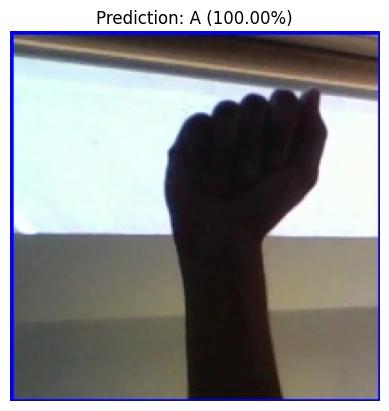

In [16]:
img_name = "A_test.jpg"   # change this to any test image
img_path = os.path.join(test_dir, img_name)

# Read image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128))   # SAME size as training
img = img / 255.0

# Model expects batch
img = np.expand_dims(img, axis=0)

# Predict
pred = model.predict(img)
pred_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

# Show
plt.imshow(cv2.imread(img_path)[:, :, ::-1])
plt.axis("off")
plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)")
plt.show()


In [17]:
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    pred_class = class_names[np.argmax(pred)]

    print(f"{img_name}  →  {pred_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
L_test.jpg  →  L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Z_test.jpg  →  Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Y_test.jpg  →  Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
F_test.jpg  →  F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
V_test.jpg  →  V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
B_test.jpg  →  B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Q_test.jpg  →  Q
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
W_test.jpg  →  W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
K_test.jpg  →  K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
C_test.jpg  →  C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
O_test.jpg  →  O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
G_test.jpg  →  G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
T_test.jpg  →  T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
U_test.jpg  →  U
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
S_test.jpg  →  S
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
N_test.jpg  →  N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
space_test.jpg  →  space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
nothing_test.jpg  →

In [18]:
model.save("/content/drive/MyDrive/asl_model.keras")
